# About this notebook

This notebook is created by Bella Ratmelia (bellar@smu.edu.sg) for SMU Libraries' Python 101: Visualizing your data in Python bite-sized workshop on 10 Feb 2023

Dataset used in this workshop:

* Netflix stock data (we will retrieve it from Yahoo Finance with the help of `yfinance` library)
* Survey data `youth-survey.csv` is a raw survey data conducted on 1010 youth from Czech Republic. This data is available on Kaggle.
* Download data of TikTok in several countries `tiktok-downloads-by-country.csv`. This data is available from Statista. 

## Preparing our data

* install and import all the necessary packages
* load our data to DataFrames

In [ ]:
pip install yfinance

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance

In [6]:
# load the survey data
survey = pd.read_csv("youth-survey.csv")

# load TikTok data
tiktok = pd.read_csv("tiktok-downloads-by-country.csv")

# retrieve our time series data, which is the Netflix stock price
nflx = yfinance.download("NFLX", start="2020-01-01", end="2020-03-31")
nflx.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2020-01-02 00:00:00-05:00 to 2020-03-30 00:00:00-04:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       61 non-null     float64
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Close      61 non-null     float64
 4   Adj Close  61 non-null     float64
 5   Volume     61 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 5.4 KB


# Using `matplotlib`

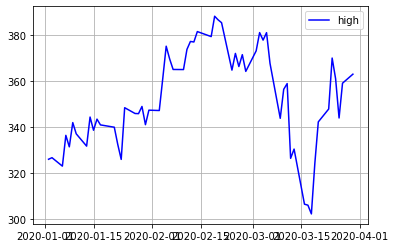

In [7]:
fig, ax = plt.subplots() # create a figure with a single axes
ax.plot(nflx.index, nflx["Open"], color='b', label='high') 

plt.grid() #show grid
plt.legend() #show legend
plt.show() #render the information

## Anatomy of a matplotlib graph

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="Drawing" style="width: 400px;"/>

## Line Chart

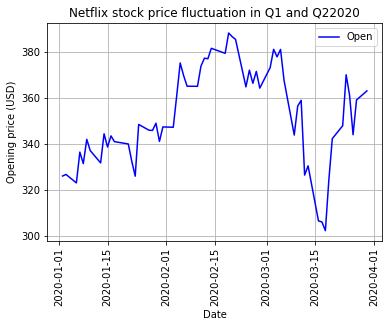

In [8]:
fig, ax = plt.subplots() # create a figure with a single axes

# plot the opening price of netflix stock
ax.plot(nflx.index, nflx["Open"], color='b', label='Open')
ax.set_xlabel("Date")
ax.set_ylabel("Opening price (USD)")
ax.set_title("Netflix stock price fluctuation in Q1 and Q22020")
ax.grid() #show grid

plt.xticks(rotation=90)
plt.legend() #show legend
plt.show() #render the information

## Bar Charts

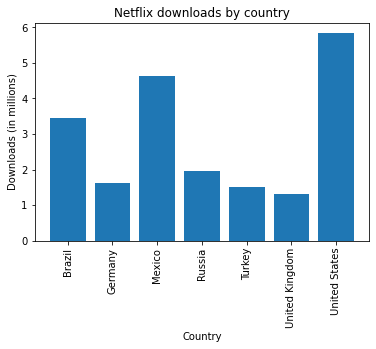

In [9]:
# Categorical data
fig, ax = plt.subplots()

ax.bar(tiktok['Country'], tiktok['Android'])

ax.set_xlabel("Country")
ax.set_ylabel("Downloads (in millions)")
ax.set_title("Netflix downloads by country")
ax.set_xticks(tiktok['Country']) 
ax.set_xticklabels(tiktok['Country'], rotation = 90) # rotate the xticks label

plt.show()

## Scatterplots

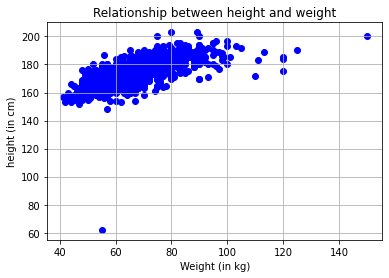

In [10]:
fig, ax = plt.subplots()

ax.scatter(survey['weight'], survey['height'], color='b')

ax.set_xlabel("Weight (in kg)")
ax.set_ylabel("height (in cm)")
ax.set_title("Relationship between height and weight")

plt.grid()
plt.show()

## Histogram

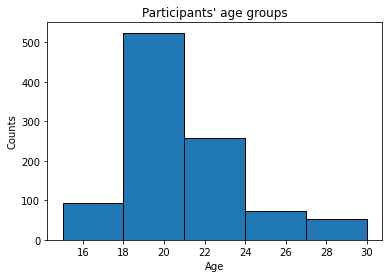

In [11]:
# histogram
fig, ax = plt.subplots()

ax.hist(survey['age'], bins=5, edgecolor='black')
ax.set_xlabel("Age")
ax.set_ylabel("Counts")
ax.set_title("Participants' age groups")

plt.show()

## Subplots

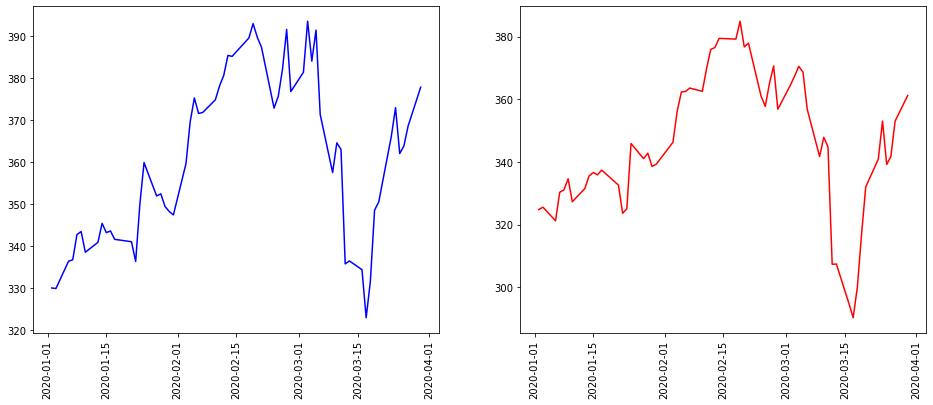

In [12]:
# subplots
# specify the figure size and make it bigger, since we are drawing two plots in one figure
fig, axs = plt.subplots(1,2, figsize=(16, 6))

# subplot 1
axs[0].plot(nflx.index, nflx["High"], color='b', label='high') 

# subplot 2
axs[1].plot(nflx.index, nflx["Low"], color='r', label='low')

# go through each subplots and fix the label rotation
for ax in axs:
    ax.tick_params(axis='x', labelrotation=90)

# save the image
plt.savefig('mychart.png')
plt.show()

# Using `seaborn`

* seaborn is built on top of matplotlib
* advantage: cleaner output, simpler syntax, integrate well with dataframe
* both are visualization library, but different library has different "rules"

In [13]:
# setup
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# or set style
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

## How Seaborn is structured

* **`Relplot`** - to show the relationship between two variables -- FacetGrid level plot
    * `scatterplot()` (with kind="scatter"; the default)
    * `lineplot()` (with kind="line")

Documentation: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

* **`Catplot`** - show the relationship between a numerical and one or more categorical variables -- FacetGrid level plot
    * Categorical scatterplots:
        * `stripplot()` (with kind="strip"; the default)
        * `swarmplot()` (with kind="swarm")
    * Categorical distribution plots:
        * `boxplot()` (with kind="box")
        * `violinplot()` (with kind="violin")
        * `boxenplot()` (with kind="boxen")
    * Categorical estimate plots:
        * `pointplot()` (with kind="point")
        * `barplot()` (with kind="bar")
        * `countplot()` (with kind="count")

Documentation: https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

* **`Displot`** - show the distribution of data points across a range -- FacetGrid level plot
    * `histplot` (with kind="hist"; the default)
    * `kdeplot` (with kind="kde")
    * `ecdfplot` (with kind="ecdf"; univariate-only)
    * `rugplot` can be added to any kind of plot to show individual observations.

Documentation: https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

## Relplots

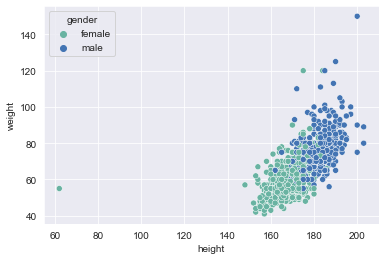

In [14]:
# use hue to tell seaborn how you want to subset the data. It should be a column name in your dataframe
sns.scatterplot(x="height", y="weight", data=survey, hue="gender")
plt.show()

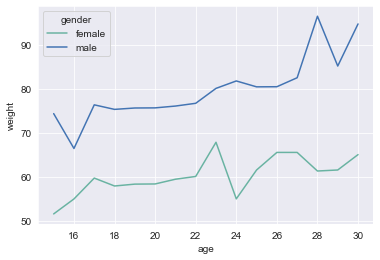

In [15]:
sns.lineplot(x='age', y='weight', data=survey, markers=True, hue="gender", ci=None)
plt.show()

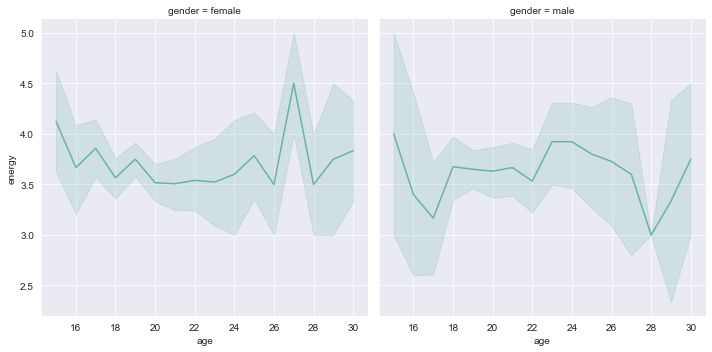

In [16]:
# you have to use fig/facetgrid-level plot (e.g. relplot or catplot)in order to draw multiple plots at one go.
sns.relplot(x='age', y='energy', data=survey, col="gender", kind="line")
plt.show()

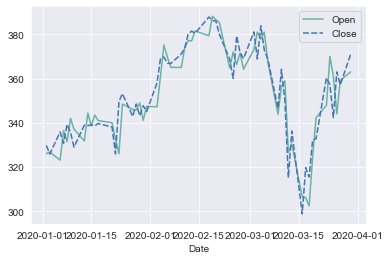

In [17]:
sns.lineplot(data=nflx[['Open', 'Close']])
plt.show()

## Catplots

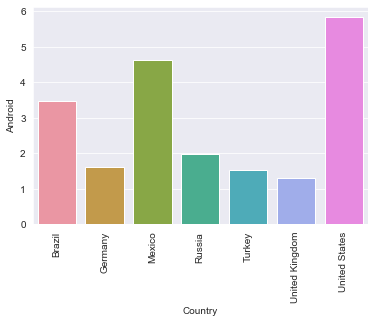

In [18]:
sns.barplot(x="Country", y="Android", data=tiktok)
plt.xticks(rotation=90)
plt.show()

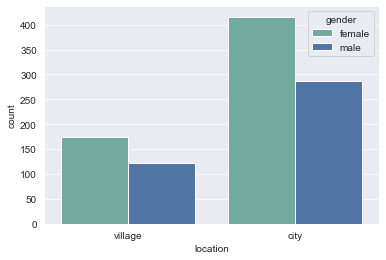

In [19]:
sns.countplot(x="location", data=survey, hue="gender")
plt.show()

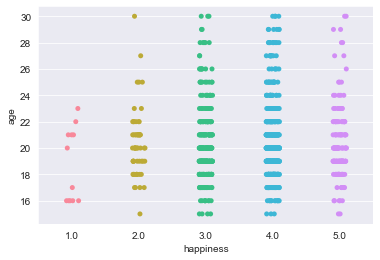

In [20]:
sns.stripplot(x="happiness", y="age", data=survey)
plt.show()

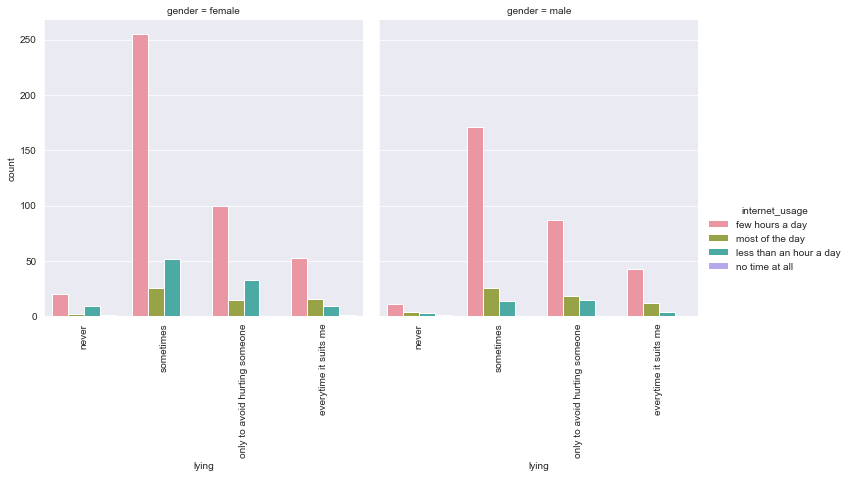

In [21]:
# create the visualization using catplot (FacetGrid-level plot), and save it to variable fg so that we can keep track of it. 
fg = sns.catplot(x="lying", data=survey, hue="internet_usage", kind="count", col="gender")

# disclaimer: found this fix through stackoverflow!
# basically what this does is go through the subplots inside the facetgrid, and fix the rotation one by one
# remember that the visualization below consists of 2 subplots
for axes in fg.axes.flat:
    axes = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.show()

## Distplots

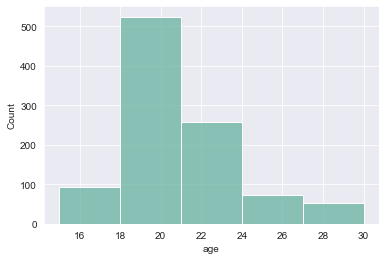

In [22]:
sns.histplot(data=survey, x="age", binwidth=3, palette="rocket")
plt.show()

## Saving figure

In [23]:
 # put this before plt.show()!
plt.savefig('catplot-1.png', dpi=300)

<Figure size 432x288 with 0 Axes>

## Seaborn themes

more here: https://seaborn.pydata.org/tutorial/color_palettes.html

In [24]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

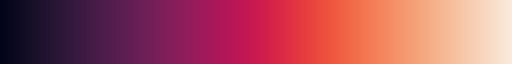

In [25]:
# goof showing intensity e.g. heatmap
sns.color_palette("rocket", as_cmap=True)

In [26]:
# setting pallete with the code below
# note that this will be applied to ALL if your visualization in the notebook. 
sns.set_palette("colorblind")

# Extra: Candlestick chart

Line chart is not the best way to display changes in stock data. The best way to do that is to use candlestick chart. The easiest way to plot a candlestick chart is to use plotly, as shown below.

In [ ]:
pip install plotly # plotly may take a while to be installed! it's a pretty large package. 

In [28]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe"

In [29]:
candlestick = go.Candlestick(
                    x=nflx.index,
                    open=nflx['Open'],
                    high=nflx['High'],
                    low=nflx['Low'],
                    close=nflx['Close']
                )

fig = go.Figure(data=[candlestick])

fig.show()